In [1]:
# General
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#  sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Keras model components
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# Misc
import math, time, os,gc

In [3]:
# Print all outputs from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Mounting GDrive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
# Path to folder in gdrive where data files are: 
pathToFolder = "/gdrive/MyDrive/FA_Project_Nykaa/"

In [6]:
#  Read dataset in pandas:
df = pd.read_csv(pathToFolder+"nyka_top_brands_cosmetics_product_reviews.csv")

In [7]:
df.shape

(61284, 18)

In [8]:
df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


In [9]:
df.isnull().sum()

product_id                  0
brand_name                  0
review_id                   0
review_title                0
review_text                 8
author                      0
review_date                 0
review_rating               1
is_a_buyer                  0
pro_user                    0
review_label            13035
product_title               0
mrp                         0
price                       0
product_rating              0
product_rating_count        0
product_tags            47782
product_url                 0
dtype: int64

In [10]:
df["review_text"].fillna(value="No Review", inplace=True)

In [11]:
df["review_rating"].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [12]:
df= df.dropna(subset=["review_rating"])

In [13]:
df["review_label"].unique()

array(['Verified Buyer', nan, 'Verified Professional'], dtype=object)

In [14]:
df["review_label"].fillna(value="Not Verified Buyer",inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
df["product_tags"].unique()

array([nan, 'FEATURED', 'BESTSELLER', 'FEATURED, BESTSELLER', 'NEW',
       'FEATURED, NEW'], dtype=object)

In [16]:
df["product_tags"].fillna(value="Missing",inplace=True)

In [17]:
df.isnull().sum()

product_id              0
brand_name              0
review_id               0
review_title            0
review_text             0
author                  0
review_date             0
review_rating           0
is_a_buyer              0
pro_user                0
review_label            0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
product_tags            0
product_url             0
dtype: int64

In [18]:
df.describe()

,product_id,review_id,review_rating,mrp,price,product_rating,product_rating_count
count,6.128300e+04,6.128300e+04,61283.000000,61283.000000,61283.000000,61283.000000,61283.000000
mean,7.983926e+05,1.485009e+07,4.414781,573.255732,462.123183,4.099132,7583.068143
std,1.281425e+06,7.383481e+06,1.062547,324.099646,264.874490,0.235946,14463.341092
min,2.500000e+02,9.600000e+01,1.000000,75.000000,45.000000,1.500000,1.000000
25%,1.604880e+05,1.102385e+07,4.000000,300.000000,262.000000,4.000000,1760.000000
50%,4.524430e+05,1.525146e+07,5.000000,599.000000,400.000000,4.100000,3925.000000
75%,7.665290e+05,2.002958e+07,5.000000,799.000000,639.000000,4.300000,8720.000000
max,7.749427e+06,2.963031e+07,5.000000,3874.000000,2947.000000,4.800000,98477.000000


In [19]:
df['product_title'].unique()

array(['Olay Ultra Lightweight Moisturiser: Luminous Whip Day Cream (non SPF)',
       'Olay Regenerist Whip Mini and Ultimate Eye Cream Combo',
       'Olay Aha & Niacinamide Super Cream , Acne Mark & Spot Removal Cream - For All Skin Types',
       'Olay White Radiance Day & Night Cream for Brightening and Glow',
       'Olay Total Effects 7 In One Anti-Ageing Day Cream Normal SPF 15',
       'Olay Ultimate Skin Regimen Kit',
       'Olay Eye Cream - With Niacinamide & Pentapeptides',
       'Olay Total Effects Day Cream For Sensitive Skin - Niacinamide',
       'Olay Total Effects 7 In One Day Cream Normal SPF 15 (Trial Size) 8gm',
       'Nykaa Skin Secrets Tea Tree & Salicylic Acid Spot Patch',
       'Nykaa Face and Eye Shield Mask',
       'Nykaa Woman Washable and Reusable Face Mask - Tropical',
       'Nykaa 3 Ply Mask With Face Shield',
       'Nykaa Naturals Apple Cider Vinegar & Ginger Anti-dandruff Hair Oil + Shampoo + Massager Combo',
       'Nykaa Love Struck Tender Touc

In [20]:
num_columns=['price']
cat_columns=['brand_name','product_title']  
text_columns=['review_title','review_text']

In [21]:
df["brand_name"].values.shape        # 1D (61283,)
df["product_title"].values.shape     #(61283,)

(61283,)

(61283,)

In [22]:
# Label or integer encode each category Instantiate object for category name transformation:

le = LabelEncoder()

# Training first on 'catname_array' :

le.fit(df['product_title'])

LabelEncoder()

In [23]:
df['product_id'].unique().size

295

In [24]:
df['product_id'].unique()

array([ 781070,  739418, 6836720,   61305,   60541,  575926,  465454,
        262993,   23694,  785729,  784422,  784419,  774771, 5202105,
       4315900, 4283093, 4148779, 4060539, 4060531, 4039424, 3955548,
       3955547, 3955546, 3955545, 3955543, 3955542, 3626216, 3494214,
       3494211, 3433811, 2809991, 2809976, 2777822, 2722174, 2722169,
       2722163, 2722162, 2722155, 2722154, 2722149, 2722148, 2722147,
       2722144, 2722137, 2697394, 2645340, 2645339, 2645338, 2645336,
       2645335, 2645334, 2645331, 2645330, 2645329, 2645328, 1502905,
       1502904, 1502902, 1498580, 1485846, 1485845, 1485844, 1485843,
       1474701, 1473197, 1366625, 1356977, 1285508, 1217419, 1171873,
       1171833, 1058010,  982132,  950973,  815797,  792460,  787778,
         68138,  646041,  626493, 5880614, 5880612, 5694317,  569411,
        564441,  564436,  551016,  551015,  551014,  540693,  520376,
       5177218,  513866,  513815,  513103, 4996634, 4996628, 4996626,
       4749405, 4692

In [25]:
df['product_title']=le.transform(df['product_title'])

In [26]:
# How many classes:
le.classes_

array(['Colorbar Mogra Mist - Scent Of An India Temple - 001',
       'Get Party Ready With Kay Beauty Lip Liner - Dance Off & Matte Lipstick - Premier',
       'Herbal Essences Aloe & Bamboo Conditioner Soft Smooth Hair- No- Sulphates and Paraben(400gm)',
       'Herbal Essences Aloe & Bamboo Shampoo + Conditioner For Soft Smooth Hair, No Sulphates & Paraben',
       'Herbal Essences Aloe & Bamboo Shampoo + Conditioner Kit For Soft Hair, Sulphate & Paraben Free',
       'Herbal Essences Aloe & Bamboo Shampoo For Soft Smooth Hair, No-Sulphates, Paraben and Silicones',
       'Herbal Essences Aloe & Eucalyptus Shampoo + Aloe & Bamboo Conditioner, No- Sulphates & Paraben',
       'Herbal Essences Aloe & Eucalyptus Shampoo For Soft Smooth Hair, No- Sulphates, Paraben and Silicones',
       'Herbal Essences Argan 2 Shampoo + Conditioner',
       'Herbal Essences Argan Oil Of Moroccan Shampoo & Conditioner With Free Neem Comb',
       'Herbal Essences Argan Oil Of Morocco Conditioner - For 

In [27]:
len(le.classes_)

292

In [28]:
#Length:
MAX_CATEGORY_VOC = len(le.classes_)
print("\n======\n")
f"Mac vocabulary size for category: {MAX_CATEGORY_VOC}"

'Mac vocabulary size for category: 292'

In [29]:
# Instantiate another object for 'brand name' transformation:

le = LabelEncoder()

# fit and transform:

le.fit(df["brand_name"])


LabelEncoder()

In [30]:
df['brand_name']=le.transform(df['brand_name'])

In [31]:
MAX_BRAND_VOC = len(le.classes_)
MAX_BRAND_VOC

11

In [32]:
df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,10,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,10,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,10,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,10,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,10,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...


In [33]:
raw_text = np.hstack(
                     [
                       df.review_title.values,
                       df.review_text.values
                      ]
                     )
raw_text[:3]

array(['Worth buying 50g one', 'Best cream to start ur day',
       'perfect for summers dry for winters'], dtype=object)

In [34]:
tok_raw = Tokenizer()           # Create Tokenizer() object
tok_raw.fit_on_texts(raw_text)  # Just training. No transformation as yet

In [35]:
# Look at word_index
tok_raw.word_index

{'it': 1,
 'the': 2,
 'and': 3,
 'is': 4,
 'i': 5,
 'a': 6,
 'this': 7,
 'for': 8,
 'to': 9,
 'good': 10,
 'product': 11,
 'very': 12,
 'my': 13,
 'but': 14,
 'of': 15,
 'not': 16,
 'so': 17,
 'love': 18,
 'in': 19,
 'shade': 20,
 'skin': 21,
 'with': 22,
 'on': 23,
 'hair': 24,
 'nice': 25,
 'you': 26,
 "it's": 27,
 'best': 28,
 'have': 29,
 'amazing': 30,
 'as': 31,
 'one': 32,
 'really': 33,
 'just': 34,
 'its': 35,
 'like': 36,
 'perfect': 37,
 'use': 38,
 'great': 39,
 'look': 40,
 'colour': 41,
 'all': 42,
 'that': 43,
 'long': 44,
 'gives': 45,
 'your': 46,
 'color': 47,
 'beautiful': 48,
 'loved': 49,
 'too': 50,
 'well': 51,
 'smooth': 52,
 'can': 53,
 'shampoo': 54,
 'are': 55,
 'buy': 56,
 'after': 57,
 'has': 58,
 'lipstick': 59,
 'easy': 60,
 'awesome': 61,
 'nykaa': 62,
 'me': 63,
 'also': 64,
 'was': 65,
 'go': 66,
 'looks': 67,
 'must': 68,
 'be': 69,
 'time': 70,
 'if': 71,
 'dry': 72,
 'texture': 73,
 'soft': 74,
 'used': 75,
 'lips': 76,
 'at': 77,
 'worth': 78,
 'fr

In [36]:
# And vocab size:
MAX_TEXT_VOC = len(tok_raw.word_index)
MAX_TEXT_VOC   # 20533

20533

In [37]:
df["seq_review_title"] = tok_raw.texts_to_sequences(df.review_title.values)

In [38]:
df["seq_review_text"] = tok_raw.texts_to_sequences(df.review_text.values)

In [39]:
df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url,seq_review_title,seq_review_text
0,781070,10,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,"[78, 226, 9908, 32]","[120, 31, 1, 618, 384, 336, 2, 506, 79, 2, 123..."
1,781070,10,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,"[28, 162, 9, 1075, 340, 180]","[1, 97, 191, 1, 618, 28, 307, 4, 1, 1614, 340,..."
2,781070,10,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,"[37, 8, 880, 72, 8, 1164]","[5, 29, 181, 84, 7, 11, 8, 559, 187, 1, 4, 37,..."
3,781070,10,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,"[16, 6, 589]","[5, 29, 104, 167, 21, 316, 7, 6732, 2047, 31, ..."
4,781070,10,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,288,1999,1599,4.1,43,Missing,https://www.nykaa.com/olay-ultra-lightweight-m...,[379],"[27, 16, 43, 10, 500, 4919, 115, 8, 158, 132]"


In [40]:
print("1.", MAX_TEXT_VOC )     # 20533
print("2.", MAX_CATEGORY_VOC)  # 292
print("3.", MAX_BRAND_VOC)     # 11

1. 20533
2. 292
3. 11


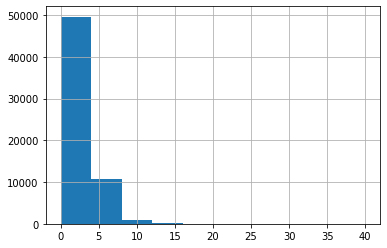

In [41]:
# Get histogram of distribution of seq_name lengths Histogram can be used to decide where to cut-off max lengths
df.seq_review_title.apply(lambda x: len(x)).hist()

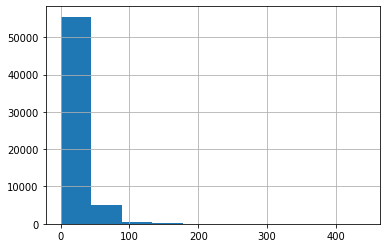

In [42]:
# Get histogram of distribution of seq_item_description Histogram can be used to decide where to cut-off max lengths
df.seq_review_text.apply(lambda x: len(x)).hist()

In [43]:
# EMBEDDINGS: MAX LENGTH OF SEQUENCES
# Based on the histograms, we select the max lengths
# OR timesteps in RNN for two integer sequences, as:
# Implication: Longer integer sequences will be truncated
MAX_REVIEW_TITLE_SEQ = 20
MAX_REVIEW_TEXT_SEQ  = 100

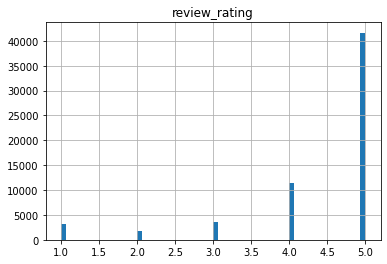

In [44]:
#Histogram of target column:
pd.DataFrame(df.review_rating).hist(bins = 60) ;

In [45]:
X = df.drop(columns=['review_rating'])
y = df['review_rating']

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size =0.3)

In [47]:
print(X_train.shape)     # (49026, 19)
print(X_test.shape)      # (18385, 19)
print(y_train.shape)     # (42898,)
print(y_test.shape)      # (18385,)

(42898, 19)
(18385, 19)
(42898,)
(18385,)


In [48]:
#  Using keras pad_sequences function:Example

print(f" Max size of sequence: {MAX_REVIEW_TITLE_SEQ}")
print(f" Shape of Xtrain_review_text: {X_train.seq_review_title.shape}")

 Max size of sequence: 20
 Shape of Xtrain_review_text: (42898,)


In [49]:
# As 's' will be a numpy array
#       to observe it let us transform it
#        into pandas dataframe:
s = pad_sequences(
                   X_train.seq_review_title,
                   maxlen=MAX_REVIEW_TITLE_SEQ
                  )

print(f"Shape of s: {s.shape}")

# Here is dataframe:
pd.DataFrame(s).head(3)

Shape of s: (42898, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,290
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,445,3,362,293


In [50]:
# As we want to process, different cols differently, for these columns, we need as many datasets. 
#      WE have 5 columns or column-sets for processing.
def get_keras_data(dataset):
    Z = {   
        'review_title':           pad_sequences(
                                                  dataset.seq_review_title,
                                                  maxlen=MAX_REVIEW_TITLE_SEQ     
                                               ),                                                       
        'review_text':            pad_sequences(
                                                 dataset.seq_review_text,
                                                 maxlen=MAX_REVIEW_TEXT_SEQ
                                               ),                                                             
        'brand_name':     np.array(dataset.brand_name),                                                
        'product_title':  dataset.product_title.values,                                                
        'price': dataset.price.values                                  
    }
    return Z


In [51]:
# Get these datasets now:

X_train = get_keras_data(X_train)  # type: dict

In [52]:
X_train.keys()

dict_keys(['review_title', 'review_text', 'brand_name', 'product_title', 'price'])

In [53]:
# Observe X_train:
# Just printing two objects for each data:
for key, value in X_train.items():
    print("\n\n============")
    print(key, ' : ', value[:2])



review_title  :  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   10 290]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  37]]


review_text  :  [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1  133   23    2   21 1885    3
  1498   93]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0   

In [54]:
# Similarly get subsets for X_test:
X_test = get_keras_data(X_test)

In [55]:
# As each dict item is a numpy array,we can check shapes. We need these below:

print(X_train["review_title"][:4])
print("\n===========")
print(X_train["review_title"].shape)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0   10  290]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0   37]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  445    3  362  293]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 1193  778 1093]]

(42898, 20)


In [56]:
# Checking more shapes.
print(X_train["review_text"][:4])
print("\n\n===========")
print(X_train["review_text"].shape)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1  133   23    2   21 1885    3
  1498   93]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

In [57]:
#  Defining sizes of categorical values AND word to vectors

word2vec_size = 70   # For text columns: seq_review_text and seq_review_title
cat2vec_size = 15    # For brand_name and product_title

In [58]:
# 5 Inputs. At each input specifying number of input-features:
review_title  =     Input(shape=(X_train["review_title"].shape[1]),      name="review_title")     # Length of each sequence
review_text   =     Input(shape=(X_train["review_text"].shape[1]),       name="review_text")      # Length of each sequence
brand_name    =     Input(shape=(1,),                                    name="brand_name")       # Just 1 feature. Hence shape=[1]
product_title =     Input(shape=(1,),                                    name="product_title")    # Just 1 feature. Hence shape=[1]
price         =     Input(shape=(1,),                                    name="price")            # Just 1 feature. Hence shape = [1]

In [59]:
abc = Embedding(15,32)(brand_name) # adding an embedding layer

In [60]:
# Output of following two also go in RNN. RNN output needs no flattening as this output is received AFTER all timesteps have been fed into RNN:
              
emb_review_title =      Embedding(MAX_TEXT_VOC,word2vec_size)(review_title)
emb_review_text =       Embedding(MAX_TEXT_VOC,word2vec_size)(review_text) 

In [61]:
# Output of following three go directly into Dense layer after flattening These need to be flattened as for every timestep there is a vector:

emb_brand_name =     Embedding(MAX_BRAND_VOC,     cat2vec_size  )(brand_name)
emb_product_title =  Embedding(MAX_CATEGORY_VOC,  cat2vec_size  )(product_title)

In [62]:
# TWO RNN layers. Both these are independent of each other:

rnn_layer2 = GRU(8)(emb_review_title)    # Output of GRU is a vector of size 8
rnn_layer1 = GRU(16)(emb_review_text)    # Output of GRU is a vector of size 16

In [63]:
# Before we concatenate, let us see shape of each output tensor. We may have to flatten few:
print(f"emb_brand_name: {emb_brand_name.shape}")            # (None, 1, 10)-- we need to Flatten it
print(f"emb_category_name: {emb_product_title.shape}")      # (None, 1, 10)-- we need to Flatten it
print(f"rnn_layer1: {rnn_layer1.shape}")                    # (None, 16)
print(f"rnn_layer1: {rnn_layer2.shape}")                    # (None, 8)

emb_brand_name: (None, 1, 15)
emb_category_name: (None, 1, 15)
rnn_layer1: (None, 16)
rnn_layer1: (None, 8)


In [64]:
# Concatenate all layer-branches:

main_l = concatenate(
                        [
                          Flatten() (emb_brand_name),
                          Flatten() (emb_product_title),
                          rnn_layer1,      
                          rnn_layer2,
                          price          # Feed numerical variables as they are
                        ]
                      )

In [65]:
# Adding classification layer
main_l = Dense(128,activation='relu') (main_l)
main_l = Dense(64,activation='sigmoid') (main_l)

In [66]:
# Output neuron. 6 as it is a classification file 
output = Dense(6, activation="sigmoid") (main_l)

In [78]:
# Formulate Model now
model = Model(
              inputs= [                     
                        review_title,
                        review_text,
                        brand_name,
                        product_title,
                        price
                       ],
              outputs= output
              )

In [79]:
# Compiling
model.compile(
                loss="mse",
                optimizer="adam",
                metrics=["mae"] 
              )

In [80]:
# Formulate model and show summary    
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 brand_name (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 product_title (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 review_text (InputLayer)       [(None, 100)]        0           []                               
                                                                                                  
 review_title (InputLayer)      [(None, 20)]         0           []                               
                                                                                            

In [70]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
# Plot the model architecture we need graphviz and pydot to be installed
plt.figure(figsize = (14,14));
plot_model(model);

<Figure size 1008x1008 with 0 Axes>

In [81]:
BATCH_SIZE = 5000
epochs = 10

In [73]:
# Observe our training data once more: Note that X_train is a dictionary of arrays:

for key, value in X_train.items():
    print("\n\n============")
    print(key, ' : ', value[:2])



review_title  :  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   10 290]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  37]]


review_text  :  [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    1  133   23    2   21 1885    3
  1498   93]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0   

In [82]:
start = time.time()
history= model.fit(X_train,
                   y_train,
                   epochs=epochs,
                   batch_size=BATCH_SIZE,
                   verbose=1
                  )
end = time.time()
print((end-start)/60)    

Epoch 1/10
9/9 [==============================] - 22s 2s/step - loss: 13.1761 - mae: 3.4700
Epoch 2/10
9/9 [==============================] - 11s 1s/step - loss: 13.0693 - mae: 3.4546
Epoch 3/10
9/9 [==============================] - 11s 1s/step - loss: 12.9938 - mae: 3.4437
Epoch 4/10
9/9 [==============================] - 12s 1s/step - loss: 12.9417 - mae: 3.4361
Epoch 5/10
9/9 [==============================] - 11s 1s/step - loss: 12.9058 - mae: 3.4309
Epoch 6/10
9/9 [==============================] - 12s 1s/step - loss: 12.8812 - mae: 3.4273
Epoch 7/10
9/9 [==============================] - 13s 1s/step - loss: 12.8639 - mae: 3.4248
Epoch 8/10
9/9 [==============================] - 11s 1s/step - loss: 12.8513 - mae: 3.4230
Epoch 9/10
9/9 [==============================] - 12s 1s/step - loss: 12.8417 - mae: 3.4216
Epoch 10/10
9/9 [==============================] - 11s 1s/step - loss: 12.8342 - mae: 3.4205
2.4481176773707074
